In [20]:
# Import dataset

import pandas as pd
population = pd.read_csv("population.csv")
population

# Aggregate data to get the whole population
population = population.groupby("StichtagDat").agg({"AnzBestWir": "sum"})

# Change column names
population.columns = ["Population"]
population.reset_index(inplace = True)
population["StichtagDat"] = pd.to_datetime(population["StichtagDat"])
population.set_index("StichtagDat", inplace = True)
population.rename_axis('Date', inplace = True)

# Convert to datetime
population

,Population
Date,
1998-01-31,359411
1998-02-28,359707
1998-03-31,358869
1998-04-30,360128
1998-05-31,360537
...,...
2023-05-31,445412
2023-06-30,444925
2023-07-31,444621


In [22]:
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()


population["Population"] = scaler.fit_transform(population["Population"].values.reshape(-1, 1))
display(population.head())


,Population
Date,
1998-01-31,0.009261
1998-02-28,0.012612
1998-03-31,0.003125
1998-04-30,0.017379
1998-05-31,0.022009


In [26]:

# Set start and end date
start_date = "2021-09-28"
end_date = "2023-11-08"

population_to_hour = population.resample("H").ffill()
population_to_hour = population_to_hour.reset_index()
population = population_to_hour.loc[(population_to_hour["Date"] >= start_date) & (population_to_hour["Date"] <= end_date)]
population.set_index("Date", inplace = True)
population

,Population
Date,
2021-09-28 00:00:00,0.848721
2021-09-28 01:00:00,0.848721
2021-09-28 02:00:00,0.848721
2021-09-28 03:00:00,0.848721
2021-09-28 04:00:00,0.848721
...,...
2023-09-29 20:00:00,0.976406
2023-09-29 21:00:00,0.976406
2023-09-29 22:00:00,0.976406


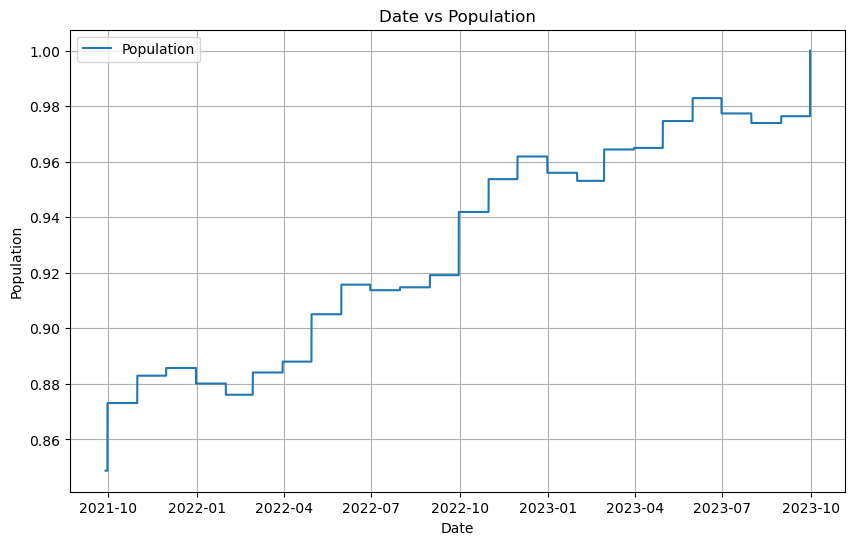

In [27]:
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(population.index, population["Population"], label = "Population")

# Formatting
plt.title('Date vs Population')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()


In [28]:
population.to_csv("population_scaled.csv")